**Project topic**: _Music habits and mental disorders._

**Main objective**: To investigate the relationship between music habits, mental disorders and well-being. Additionally, to explore how different music preferences are interrelated.

Data have been obtained from 2 sources: **kaggle.com** and from my **private survey**. Firstly data was read as dataframes and cleaned by removing columns with timestampt and permissions, and then was concatenated together. Shapes of dataframes are:

In [124]:
import pandas as pd
df_public = pd.read_csv('mxmh_survey_results.csv')
df_public = df_public.drop(['Timestamp','Permissions'], axis=1)

df_mine = pd.read_csv('my_survey_results.csv')
df_mine = df_mine.drop(['Sygnatura czasowa'], axis=1)
#fixing column name
df_mine = df_mine.rename(columns={'Instrumenalist': 'Instrumentalist'})

df = pd.concat([df_public, df_mine], axis=0, ignore_index=True)
print(f'public dataframe: {df_public.shape}')
print(f'private dataframe: {df_mine.shape}')
print(f'concatenated: {df.shape}')

public dataframe: (736, 31)
private dataframe: (63, 31)
concatenated: (799, 31)


Result dataframe has 799 rows and 32 columns

- First 5 rows of dataframe:

In [125]:
display(df.iloc[:, :11].head()) 
display(df.iloc[:, 11:22].head()) 
display(df.iloc[:, 22:32].head())


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical]
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never


,Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop]
0,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently
1,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes
2,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely
3,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes
4,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes


,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


- Checking how many values of features are empty:

In [126]:
df.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

- Checking types of features:

In [127]:
df.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                              object
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


- Type of column "BPM" is object. However it supposed to be float64, which suggests that respondents has given string answer, except number. It also contains 107 nulls. Therefore it should be removed from dataframe.

In [128]:
df = df.drop(['BPM'], axis=1)
df.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety',
       'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')

- Let's look at possible answers of questions and the number of respondents who answered them.

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety',
       'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')


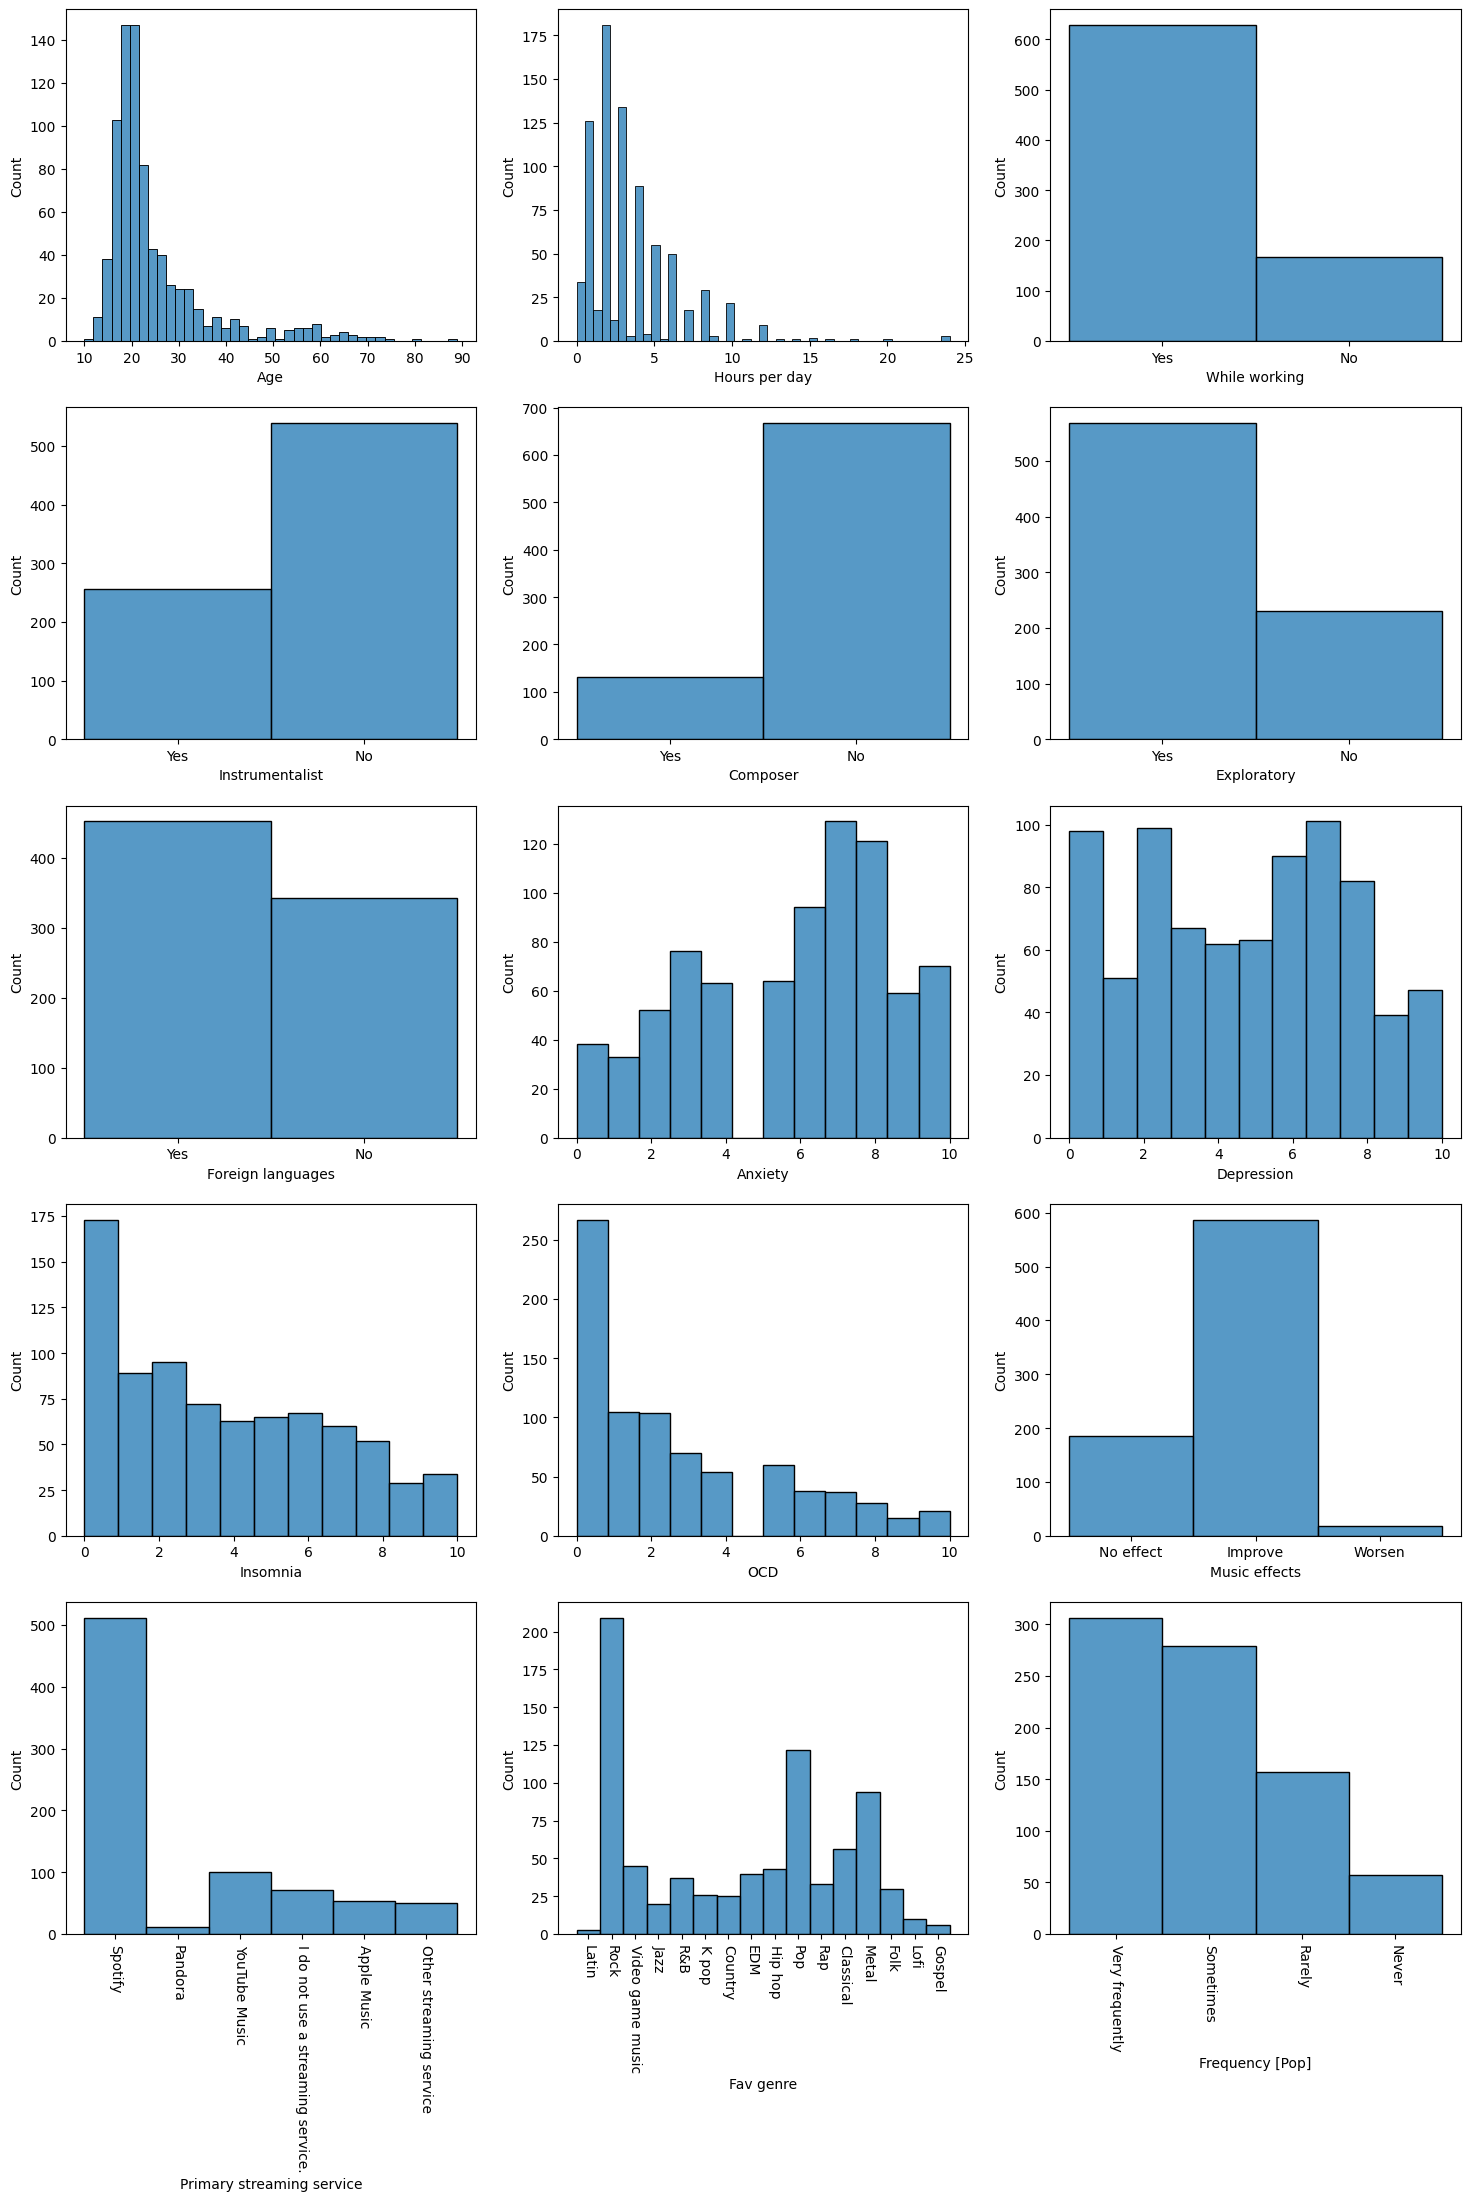

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt 
n = 5
print(df.columns)
columns_to_assign = ['Age','Hours per day','While working', 'Instrumentalist','Composer',
                    'Exploratory','Foreign languages','Anxiety','Depression','Insomnia','OCD',
                    'Music effects','Primary streaming service','Fav genre','Frequency [Pop]']
df_short = df[columns_to_assign]

f, axs = plt.subplots(n,3, figsize=(18,n*5))
columns = iter(df_short.columns)
for i in range(n):
    for j,ax in enumerate(axs[i]):
        sns.histplot(x=df_short[next(columns)], ax=ax)
        if i == 4:
            ax.tick_params(axis='x', rotation=270)

Individuals with Age > 75 will be removed, bacuse they are outliers.

In [130]:
df = df.drop(df.loc[df['Age'] > 75].index)

- These are possible answers about **favourite genre**:

In [131]:
grouped = df.groupby('Fav genre').size().reset_index(name='Count')

grouped_df = pd.DataFrame({
    'Favorite genre': grouped['Fav genre'],
    'Count': grouped['Count']
})

display(grouped_df)

,Favorite genre,Count
0,Classical,55
1,Country,25
2,EDM,40
3,Folk,30
4,Gospel,6
5,Hip hop,43
6,Jazz,20
7,K pop,26
8,Latin,3
9,Lofi,10


- Below is a comparison of different **favourite genres** and **number of instrumentalists** in these groups.

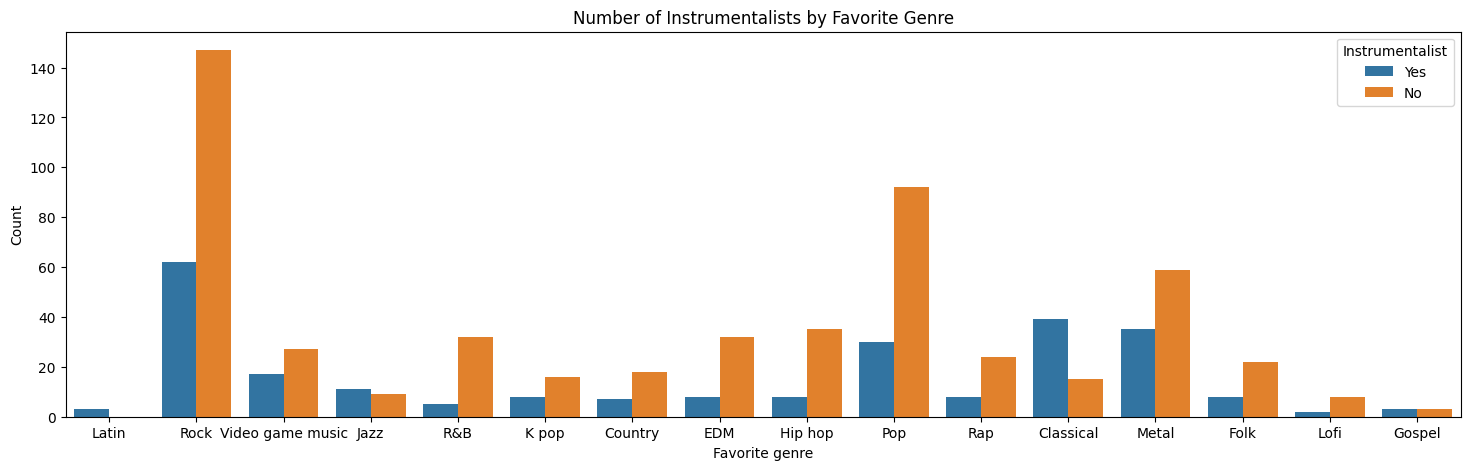

In [132]:
figure = plt.figure(figsize=(18, 5))

df_cleaned = df.dropna(subset=['Instrumentalist', 'Fav genre'])

ax = sns.countplot(x='Fav genre', hue='Instrumentalist', data=df_cleaned)

# Counting the number of instrumentalists by favorite genre
group_counts = df_cleaned.groupby(['Fav genre', 'Instrumentalist']).size().unstack()

plt.xlabel('Favorite genre')
plt.ylabel('Count')
plt.title('Number of Instrumentalists by Favorite Genre')

plt.show()


We can observe that groups which stand out from others are **'Jazz','Classical'**. They have more Instrumentalists than Non-Instrumentalists. In group **'Gospel'** these numbers are equal, and in group **'Latin'** there are only Instrumentalists, but it shouldn't be took into account, because of small 'Count' value.

- And there is a comparison between different **favourite genres** and **number of composers** in these groups.

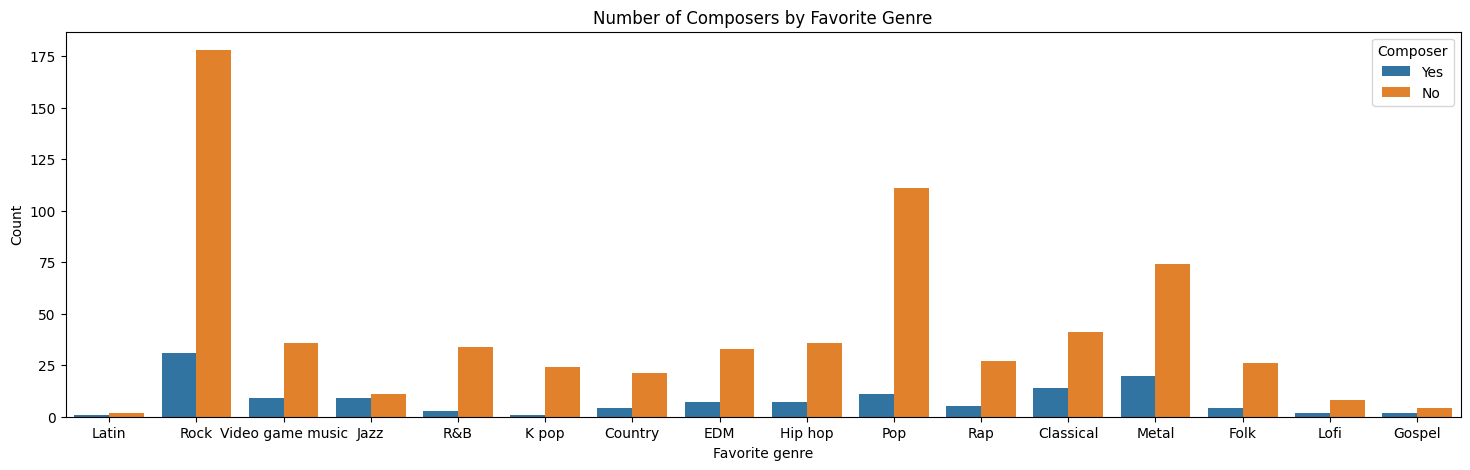

In [133]:
figure = plt.figure(figsize=(18, 5))

df_cleaned = df.dropna(subset = ['Composer', 'Fav genre'])

ax = sns.countplot(x = 'Fav genre', hue = 'Composer', data = df_cleaned)

# Counting the number of instrumentalists by favorite genre
group_counts = df_cleaned.groupby(['Fav genre', 'Composer']).size().unstack()

plt.xlabel('Favorite genre')
plt.ylabel('Count')
plt.title('Number of Composers by Favorite Genre')

plt.show()

In all groups there is more non-composers, than composers. We can observe that Jazz bars are approximately similar in size within a group. This characteristic reflects the essence of Jazz music, which is improvisation. Bars in Latin and Gospels are also similar, but they won't be took into account, because of small 'Count' value.

- Now let us compare different favourite genres and exploratoribility of respondents in these groups.

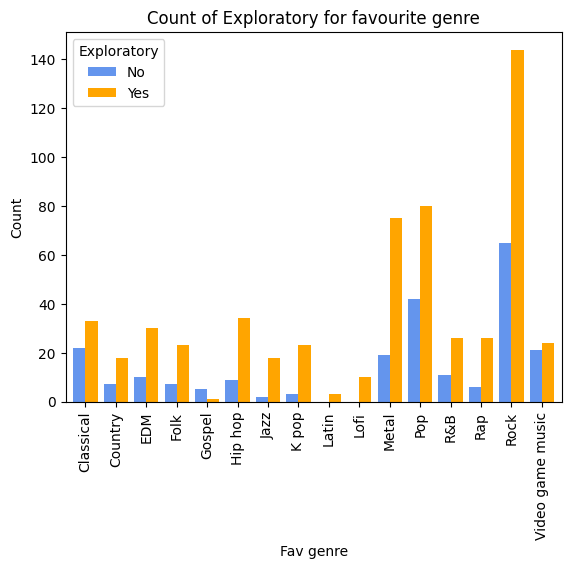

In [134]:
# Counting the number of composers by favorite genre
music_exploratory_counts = df.groupby('Fav genre')['Exploratory'].value_counts().unstack()

ax = music_exploratory_counts.plot(kind='bar', width=0.8, color=['#6495ED', 'orange'])

plt.xlabel('Fav genre')
plt.ylabel('Count')
plt.title('Count of Exploratory for favourite genre')

plt.legend(title='Exploratory')
plt.show()

Most groups display, that members of them are exploratory, except **Gospel**. Small difference between bars in groups occurs in **Classical** and **Video game music**. This may indicate the conservation of individuals of these genres.

- Now we will check if there is correlation between **level of mental illness** and **hours of daily listening to music**. The plot will display the average number of hours for each disease, along with the corresponding confidence intervals. 

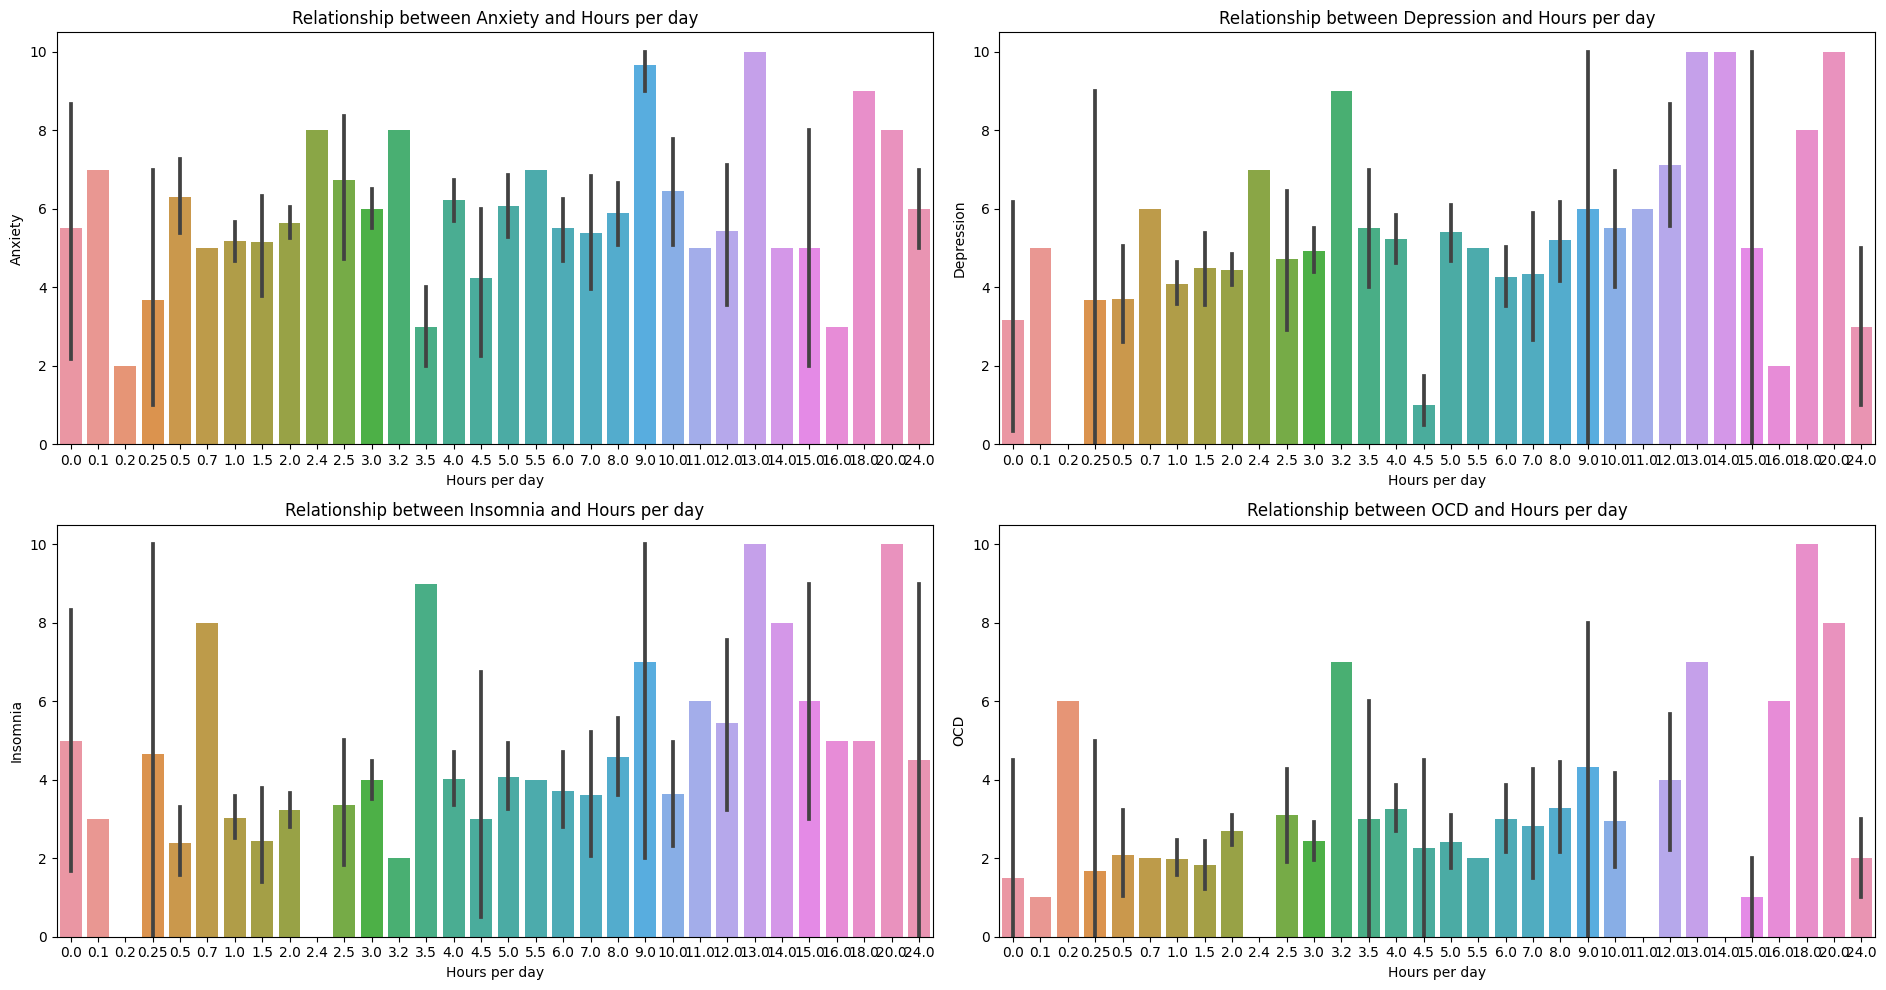

In [135]:
diseases = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

plt.figure(figsize=(19, 10))

for i, disease in enumerate(diseases):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Hours per day', y=disease, data=df)
    plt.xlabel('Hours per day')
    plt.ylabel(disease)
    plt.title(f'Relationship between {disease} and Hours per day')

plt.tight_layout()
plt.show()

As we can observe, the topmost bars predominate on the right side of plots. We can conclude that individuals with a high level of mental illness tend to listen to more hours of music. However, it is worth noting that the bars on the right side of the 'Depression' and 'OCD' plots are very low. Therefore, listening to many hours of music does not necessarily indicate a high level of mental illness.

The next observation that can be made by comparing sum of the heights of the bars in the charts is that **anxiety** has the highest number of people affected, while OCD has the lowest.

- Correlation between the level of **anxiety** and the **effects of music** on listeners:

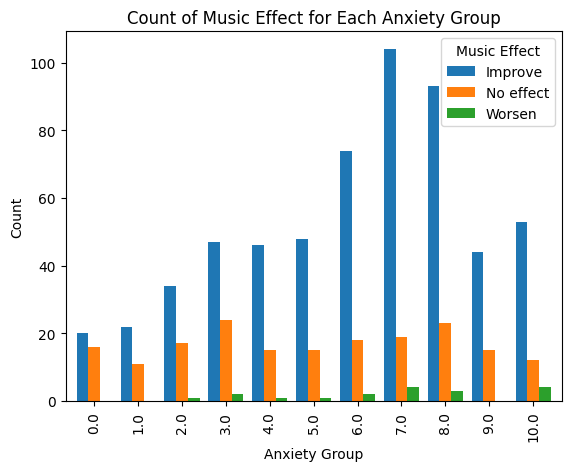

In [136]:
#removing because it's an outlier
df_cleaned = df[df['Anxiety'] != 7.5]

# Counting the number of music effects by anxiety group
music_effect_counts = df_cleaned.groupby('Anxiety')['Music effects'].value_counts().unstack()

# Plotting the counts
music_effect_counts.plot(kind='bar', width=0.8)

plt.xlabel('Anxiety Group')
plt.ylabel('Count')
plt.title('Count of Music Effect for Each Anxiety Group')

plt.legend(title='Music Effect')
plt.show()

You can observe that there are no 'Worsen' bars on the left side. However, starting from group 2, almost all bars have a 'Worsen' component. In group **10**, the height of the 'Worsen' bar is comparable to the height of the 'Worsen' bar of **7**. However, the 'Improve' bar is almost twice smaller in group 10 than in 7.  
  
Therefore, we can conclude that individuals with the highest level of anxiety may experience the most negative impact from music.

- Comparing all of the features in different anxiety groups:

In [137]:
import numpy as np
# Grouping by 'Anxiety'
grouped_data = df.groupby('Anxiety')

# Counting the mean values for numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

numeric_columns = numeric_columns.drop('Anxiety')

mean_values = grouped_data[numeric_columns].mean().round(2)

display(mean_values)

# Counting the most common values for categorical columns
categorical_columns = df.select_dtypes(include='object').columns
mode_values = grouped_data[categorical_columns].apply(lambda x: x.mode().iloc[0])

# Displaying the results
display(mode_values.iloc[:, :13])
display(mode_values.iloc[:, 13:])



,Age,Hours per day,Depression,Insomnia,OCD
Anxiety,,,,,
0.0,28.35,3.32,1.81,1.86,1.03
1.0,31.45,3.14,1.42,2.12,0.97
2.0,27.87,3.68,2.21,2.58,1.31
3.0,25.83,3.12,3.05,2.18,1.88
4.0,24.92,3.14,3.78,3.05,1.65
5.0,24.25,3.76,4.64,4.45,2.59
6.0,23.85,3.12,4.41,3.46,1.90
7.0,22.91,3.58,5.36,3.81,3.29
7.5,16.00,4.00,5.00,7.00,8.50


,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop]
Anxiety,,,,,,,,,,,,,
0.0,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,Never,Never,Never,Never
1.0,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,Never,Never,Never,Never
2.0,Spotify,Yes,No,No,Rock,Yes,No,Rarely,Never,Never,Never,Never,Sometimes
3.0,Spotify,Yes,No,No,Rock,Yes,No,Rarely,Never,Never,Never,Never,Sometimes
4.0,Spotify,Yes,No,No,Rock,Yes,Yes,Sometimes,Never,Never,Never,Never,Rarely
5.0,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,Rarely,Never,Never,Sometimes
6.0,Spotify,Yes,No,No,Pop,Yes,Yes,Rarely,Never,Never,Never,Never,Sometimes
7.0,Spotify,Yes,No,No,Rock,Yes,No,Rarely,Never,Never,Never,Never,Sometimes
7.5,Spotify,Yes,No,No,Pop,Yes,Yes,Rarely,Rarely,Sometimes,Sometimes,Rarely,Very frequently


,Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
Anxiety,,,,,,,,,,,
0.0,Never,Never,Never,Never,Never,Sometimes,Never,Never,Very frequently,Rarely,Improve
1.0,Never,Never,Never,Never,Never,Rarely,Never,Never,Very frequently,Rarely,Improve
2.0,Rarely,Never,Rarely,Never,Never,Sometimes,Sometimes,Very frequently,Very frequently,Never,Improve
3.0,Never,Never,Never,Never,Never,Very frequently,Never,Never,Very frequently,Never,Improve
4.0,Rarely,Never,Never,Never,Never,Sometimes,Rarely,Never,Very frequently,Rarely,Improve
5.0,Never,Never,Never,Rarely,Never,Very frequently,Rarely,Sometimes,Very frequently,Never,Improve
6.0,Rarely,Never,Never,Never,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Improve
7.0,Never,Never,Never,Never,Never,Very frequently,Rarely,Sometimes,Very frequently,Never,Improve
7.5,Rarely,Sometimes,Rarely,Sometimes,Rarely,Very frequently,Rarely,Rarely,Rarely,Rarely,Improve


For anxiety, the age group with the highest prevalence of mental illness tends to be younger, specifically those under 23 years old. On the other hand, individuals around 30 years old appear to have relatively better mental well-being in terms of anxiety.

Furthermore, there is a positive correlation between the severity of anxiety and the average level of other diseases. In other words, as anxiety levels increase, so does the average level of other illnesses.

- We can also do **clustering for different age groups** and show mean values of numerical features and most recent for categorical features:

In [138]:
age_groups = {
    "10-20": (10, 20),
    "21-25": (21, 25),
    "26-30": (26, 30),
    "31-35": (31, 35),
    "36-40": (36, 40),
    "41-60": (41, 60),
    "61-75": (61, 75)
}

def assign_age_group(age):
    for label, (start, end) in age_groups.items():
        if start <= age <= end:
            return label
    return None

df_ag = df.copy()
df_ag['AgeGroup'] = df['Age'].apply(assign_age_group)

age_group_means = df_ag.groupby('AgeGroup').mean()
age_group_means_df = pd.DataFrame(age_group_means.round(2))
display(age_group_means_df)

age_group_modes = pd.DataFrame(index=age_groups.keys())

# Counting the most common values for categorical columns
for column in df_ag.select_dtypes(include='object'):
    mode_values = df_ag.groupby('AgeGroup')[column].apply(lambda x: x.mode().iloc[0])
    age_group_modes[column] = mode_values.values

display(age_group_modes.iloc[:, :13])
display(age_group_modes.iloc[:, 13:-1])

C:\Users\agabe\AppData\Local\Temp\ipykernel_22476\2565940541.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_group_means = df_ag.groupby('AgeGroup').mean()


,Age,Hours per day,Anxiety,Depression,Insomnia,OCD
AgeGroup,,,,,,
10-20,17.57,3.79,5.81,4.46,3.57,2.66
21-25,22.31,3.39,6.03,5.15,3.38,2.88
26-30,27.65,3.69,6.17,5.47,4.01,2.73
31-35,32.62,3.11,5.92,5.23,4.08,2.73
36-40,37.67,2.74,5.29,4.50,4.88,2.33
41-60,50.63,2.86,4.12,3.29,3.88,1.65
61-75,66.63,3.01,4.79,3.47,3.05,1.21


,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop]
10-20,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,Never,Never,Never,Sometimes
21-25,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,Never,Never,Never,Rarely
26-30,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,Never,Rarely,Never,Sometimes
31-35,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,Never,Sometimes,Never,Sometimes
36-40,Spotify,Yes,No,No,Rock,Yes,Yes,Sometimes,Never,Never,Sometimes,Never,Rarely
41-60,Spotify,Yes,No,No,Rock,Yes,No,Sometimes,Never,Never,Never,Never,Never
61-75,I do not use a streaming service.,Yes,No,No,Rock,No,No,Sometimes,Never,Never,Rarely,Never,Never


,Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
10-20,Never,Never,Never,Never,Never,Very frequently,Never,Rarely,Very frequently,Rarely,Improve
21-25,Never,Never,Never,Never,Never,Very frequently,Never,Sometimes,Very frequently,Sometimes,Improve
26-30,Rarely,Never,Never,Never,Rarely,Sometimes,Never,Rarely,Very frequently,Rarely,Improve
31-35,Rarely,Never,Never,Never,Very frequently,Sometimes,Never,Rarely,Very frequently,Never,Improve
36-40,Rarely,Never,Never,Never,Very frequently,Sometimes,Rarely,Rarely,Sometimes,Never,Improve
41-60,Rarely,Never,Never,Never,Never,Sometimes,Sometimes,Never,Sometimes,Never,Improve
61-75,Never,Never,Sometimes,Never,Never,Sometimes,Rarely,Never,Sometimes,Never,Improve


We can observe that **Rock** is not overrated, as it emerged as the most favorite genre across all age groups. **Classical** music is most frequently listened to by individuals in the age group of 36 and above. On the other hand, genres like **Hip Hop and Rap** are more popular among younger people compared to older individuals.

Furthermore, individuals between **the ages of 20-30** tend to have the highest levels of **mental health issues**. However, there is a decreasing trend in the prevalence of mental disorders as age increases.

- Now we will examine the possibility of predicting one feature based on others, as well as determining which features have the greatest impact on that particular feature. We will use **Decision Tree Classifier** to count impact of features and **Logistic Regression** and **confusion matrix**, because the features we try to predict are **categorical**.

Predicted features:  
 - Instrumentalist
 - Age group
 - Favourite genre

_1. Defining numerical and categorical features for each feature_

In [139]:
#predict if instrumentalist
def define_fetures_instrumentalist(df_src):
       numerical_features = ['Age', 'Hours per day','Anxiety', 'Depression', 'Insomnia', 'OCD']
       categorical_features = ['Primary streaming service', 'While working', 'Composer', 'Fav genre',
              'Exploratory', 'Foreign languages', 'Frequency [Classical]',
              'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
              'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
              'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
              'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
              'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
              'Music effects']

       df = df_src.dropna(subset=['Instrumentalist'], axis=0)
       X = df.drop('Instrumentalist', axis=1)
       y = df['Instrumentalist']

       return numerical_features, categorical_features, X, y

#predict age group
def define_features_age(df_src):
       df = df_src.dropna(subset=['Age'], axis=0)
       df['AgeGroup'] = df['Age'].apply(assign_age_group)


       numerical_features = ['Hours per day','Anxiety', 'Depression', 'Insomnia', 'OCD']
       categorical_features = ['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
        'Music effects']
       
       X = df.drop(['Age', 'AgeGroup'], axis=1)
       y = df['AgeGroup']

       return numerical_features, categorical_features, X, y

#predict fav genre
def define_features_fav_genre(df_src):
       numerical_features = ['Age','Hours per day']
       categorical_features = ['While working', 'Composer',
       'Exploratory', 'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
        'Music effects','Anxiety', 'Depression', 'Insomnia', 'OCD','Primary streaming service','Instrumentalist']

       #usywamy wiersze z kolumny Instrumentalist z brakującymi wartościami
       df = df_src.dropna(subset=['Fav genre'], axis=0)
       X = df.drop('Fav genre', axis=1)
       y = df['Fav genre']
       return numerical_features, categorical_features, X, y


_2. Defining transformers and preprocessor_

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

def define_transformers(numerical_features, categorical_features):
    # Numerical features 
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Categorical values
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))  
    ])

    # ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    return preprocessor

_3. Creating classifier_

In [141]:
from sklearn.tree import DecisionTreeClassifier

def define_classifier(X,y,preprocessor):
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)

    clf_knn = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier',clf)
    ]) 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf_knn.fit(X_train, y_train)

    y_pred = clf_knn.predict(X_test)
    
    return X_train, y_train, X_test, y_test, y_pred, clf

_4. Counting impact of features_

In [142]:
def define_importances(clf, preprocessor, categorical_features, y_pred, y_test):
    importances = clf.feature_importances_

    # Wyodrębnij nazwy kolumn
    num_column_names = preprocessor.transformers_[0][2]
    cat_column_names = preprocessor.transformers_[1][1]['encoder'].get_feature_names_out(categorical_features)

    num_importances = importances[:len(num_column_names)]

    cat_importances = importances[len(num_column_names):]

    # Choosing only features with importance > 0.0
    important_features = []
    for feature, importance in zip(num_column_names, num_importances):
        if(importance > 0.0):
            important_features.append((feature, importance))

    for feature, importance in zip(cat_column_names, cat_importances):
        if(importance > 0.0):
            important_features.append((feature, importance))

    df_importances = pd.DataFrame(columns=["Feature", "Importance"])

    for feature, importance in sorted(important_features[:10], key=lambda x: x[1], reverse=True):
        df_importances = pd.concat([df_importances, pd.DataFrame({"Feature": [feature], "Importance": [importance]})], ignore_index=True)


    display(df_importances)
    accuracy = accuracy_score(y_test, y_pred)

    print(classification_report(y_test, y_pred,zero_division=1))

_5. Drawing plots_

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

def draw_plot(preprocessor,X_train, y_train, X_test, y_test,i):
    logreg_pip = Pipeline([
        ('preprocessor', preprocessor),
        ('logreg', LogisticRegression(max_iter=1000))
    ])

    logreg_pip.fit(X_train, y_train)
    y_pred = logreg_pip.predict(X_test)

    # Count number of correct predictions
    cm = confusion_matrix(y_test, y_pred)
    cm_flipped = np.flipud(cm)

    # Create plot of confusion matrix
    sns.heatmap(cm_flipped, annot=True, fmt='d', cmap='Blues')

    # Add labels to plot
    plt.xlabel('Predicted')
    plt.ylabel('True')

    ytick_labels = reversed(np.unique(y_test))  #  Reverse order of labels
    plt.yticks(np.arange(len(np.unique(y_test))) + 0.5, labels=ytick_labels)

    # Change x axis labels
    xtick_labels = np.unique(y_test)
    plt.xticks(np.arange(len(np.unique(y_test))) + 0.5, labels=xtick_labels)
    plt.tick_params(axis='x', rotation=90)

    plt.gca().set_yticklabels(labels=plt.gca().get_yticklabels(), rotation=0)


    # Rotation of labels on x axis by 90 degrees
    plt.tick_params(axis='x', rotation=0)

    #labels fix on third plot
    if i == 2:
        # Rotation of labels on x axis by 270 degrees
        plt.tick_params(axis='x', rotation=270)


    accuracy = accuracy_score(y_test, y_pred)
    print("Regression accuracy:", accuracy.round(2))
    
    # Wyświetl wykres
    plt.show()


_6. Connecting 1.) 2.) 3.) 4.) 5.)_

-----------------------instrumentalist-----------------------------


,Feature,Importance
0,Composer_Yes,0.403299
1,Age,0.134710
2,Frequency [Classical]_Very frequently,0.104783
3,Frequency [EDM]_Never,0.033557
4,Fav genre_Folk,0.030307
5,OCD,0.022310
6,Depression,0.019331
7,While working_No,0.017100
8,Frequency [Country]_Sometimes,0.013979
9,Primary streaming service_Spotify,0.009593


              precision    recall  f1-score   support

          No       0.74      0.92      0.82       111
         Yes       0.59      0.27      0.37        48

    accuracy                           0.72       159
   macro avg       0.67      0.59      0.60       159
weighted avg       0.70      0.72      0.69       159



Regression accuracy: 0.72


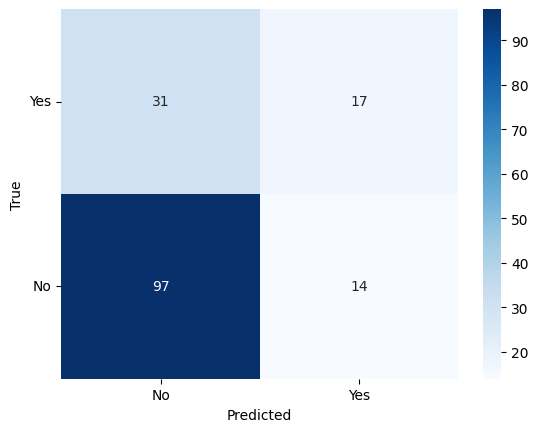

In [144]:
ff = define_fetures_instrumentalist(df)

print("-----------------------instrumentalist-----------------------------")
numerical_features, categorical_features, X, y = ff
preprocessor = define_transformers(numerical_features, categorical_features)
X_train, y_train, X_test, y_test, y_pred, clf = define_classifier(X,y,preprocessor)
define_importances(clf, preprocessor, categorical_features, y_pred, y_test)
draw_plot(preprocessor,X_train, y_train, X_test, y_test,0)


The Decision Tree Classifier classified properly 72% of test set.  
The model has relatively good precision for the "No" class but poor precision for the "Yes" class:  
  
For the "No" class:  
- Precision: 0.74, indicating that the model correctly classified 74% of the samples as "No" out of all the samples classified as "No".  
- Recall: 0.92, meaning that the model correctly identified 92% of all "No" samples relative to all true "No" samples.  
- F1-score: 0.82, which represents the harmonic average of precision and recall. A higher F1-score suggests a good balance between accuracy and recall for the "No" class.  

For the "Yes" class:  
- Precision: 0.59, indicating that the model correctly classified 59% of the samples as "Yes" out of all the samples classified as "Yes".  
- Recall: 0.27, meaning that the model correctly identified only 27% of all "Yes" samples relative to all true "Yes" samples.  
- F1-score: 0.37, which indicates a lower performance of the model in classifying the "Yes" samples.  

The three most crucial features determining whether someone is an instrumentalist are:
- Composer_Yes	0.403299
- Age 0.134710
- Frequency [Classical]_Very frequently	0.104783

-----------------------age group-----------------------------


C:\Users\agabe\AppData\Local\Temp\ipykernel_22476\4025427472.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = df['Age'].apply(assign_age_group)


,Feature,Importance
0,Frequency [Folk]_Never,0.146794
1,Depression,0.074304
2,Exploratory_No,0.072042
3,Fav genre_Rock,0.055876
4,Primary streaming service_I do not use a strea...,0.054129
5,Primary streaming service_Pandora,0.041130
6,Fav genre_Pop,0.039430
7,Hours per day,0.038556
8,Frequency [Country]_Rarely,0.019630
9,Frequency [Classical]_Rarely,0.018845


              precision    recall  f1-score   support

       10-20       0.48      0.58      0.53        72
       21-25       0.23      0.43      0.30        35
       26-30       0.00      0.00      0.00        22
       31-35       1.00      0.00      0.00        13
       36-40       1.00      0.00      0.00         3
       41-60       0.33      0.14      0.20        14
       61-75       1.00      0.00      0.00         1

    accuracy                           0.37       160
   macro avg       0.58      0.16      0.15       160
weighted avg       0.40      0.37      0.32       160

Regression accuracy: 0.44


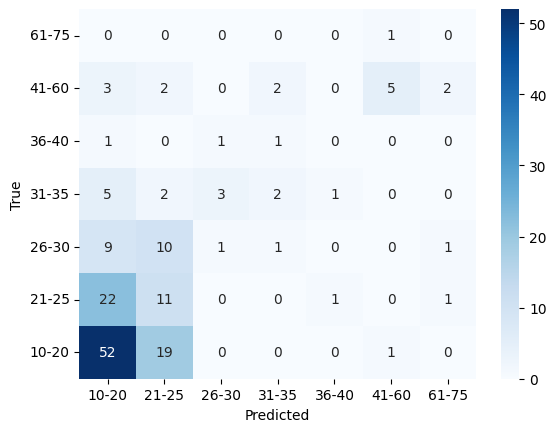

In [145]:
ff =  define_features_age(df)

print("-----------------------age group-----------------------------")

numerical_features, categorical_features, X, y = ff
preprocessor = define_transformers(numerical_features, categorical_features)
X_train, y_train, X_test, y_test, y_pred, clf = define_classifier(X,y,preprocessor)
define_importances(clf, preprocessor, categorical_features, y_pred, y_test)
draw_plot(preprocessor,X_train, y_train, X_test, y_test,1)

The model exhibits limited capability in predicting age groups based on the available data. It performed relatively better in predicting individuals belonging to the 10-20 age group compared to other age groups.
The three most crucial features determining whether someone is an age group are:
- Frequency [Folk]_Never	0.146794
- Depression	0.074304
- Exploratory_No	0.072042

-----------------------fav genre-----------------------------


,Feature,Importance
0,Frequency [Classical]_Very frequently,0.104352
1,Frequency [EDM]_Very frequently,0.057141
2,Frequency [Hip hop]_Never,0.020785
3,Frequency [Country]_Very frequently,0.017221
4,Frequency [K pop]_Very frequently,0.013632
5,Frequency [Jazz]_Rarely,0.012793
6,Frequency [Gospel]_Never,0.011476
7,Frequency [Hip hop]_Sometimes,0.010931
8,Frequency [Folk]_Very frequently,0.009001
9,Frequency [EDM]_Rarely,0.004725


                  precision    recall  f1-score   support

       Classical       0.69      0.60      0.64        15
         Country       1.00      0.67      0.80         3
             EDM       0.00      0.00      0.00        10
            Folk       1.00      0.00      0.00         4
          Gospel       1.00      0.00      0.00         2
         Hip hop       0.06      0.29      0.11         7
            Jazz       1.00      0.00      0.00         4
           K pop       1.00      0.00      0.00         4
            Lofi       1.00      0.00      0.00         4
           Metal       0.58      0.33      0.42        21
             Pop       0.42      0.92      0.58        26
             R&B       1.00      0.00      0.00         5
             Rap       1.00      0.00      0.00         2
            Rock       0.50      0.40      0.45        47
Video game music       0.25      0.17      0.20         6

        accuracy                           0.40       160
       macro

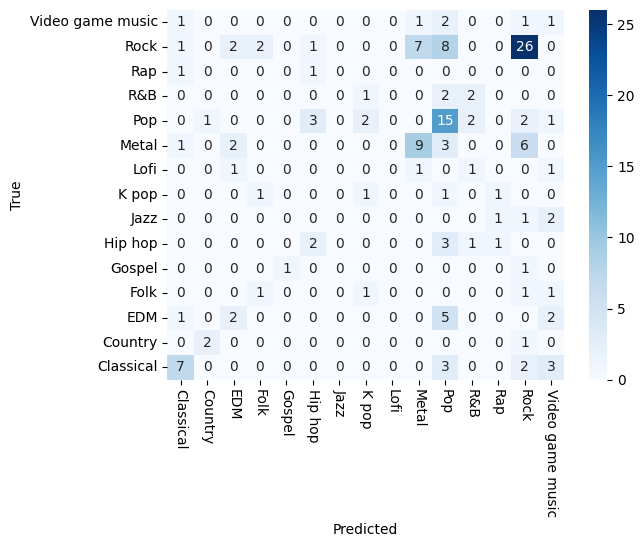

In [146]:
ff =  define_features_fav_genre(df)

print("-----------------------fav genre-----------------------------")

numerical_features, categorical_features, X, y = ff
preprocessor = define_transformers(numerical_features, categorical_features)
X_train, y_train, X_test, y_test, y_pred, clf = define_classifier(X,y,preprocessor)
define_importances(clf, preprocessor, categorical_features, y_pred, y_test)
draw_plot(preprocessor,X_train, y_train, X_test, y_test,2)

The model performs poorly, but there is a diagonal outline in the confusion matrix. 
Interestingly, the model attempted to assign a significant number of samples to the rock genre instead of metal, and vice versa.

- Finding a better model for the last dataset - predicting favorite genre.

In [147]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[0.05,0.75, 0.1, 0.25, 0.5, 1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)


clf_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',clf)
]) 

clf_knn.fit(X_train, y_train)

best_model = clf.best_estimator_

clf_knn.named_steps['classifier'] = best_model

y_pred = clf_knn.predict(X_test)

print("Best Hyperparameters:")
print(clf.best_params_)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

C:\Users\agabe\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters:
{'C': 0.05, 'kernel': 'linear'}
Model accuracy: 0.54
                  precision    recall  f1-score   support

       Classical       0.73      0.53      0.62        15
         Country       1.00      0.33      0.50         3
             EDM       0.57      0.40      0.47        10
            Folk       0.40      0.50      0.44         4
          Gospel       0.00      0.00      0.00         2
         Hip hop       0.33      0.57      0.42         7
            Jazz       0.00      0.00      0.00         4
           K pop       0.25      0.25      0.25         4
            Lofi       0.00      0.00      0.00         4
           Metal       0.60      0.57      0.59        21
             Pop       0.52      0.65      0.58        26
             R&B       0.33      0.20      0.25         5
             Rap       0.00      0.00      0.00         2
            Rock       0.66      0.74      0.70        47
Video game music       0.20      0.33      0.25       

C:\Users\agabe\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agabe\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agabe\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

For predicting the favorite genre, a better model was found to be **GridSearchCV with C=0.05 and a linear kernel**.